In [13]:
import plumed
import matplotlib.pyplot as plt
import mdtraj as md
import numpy as np

In [19]:
# import COLVAR file as pandas dataset
# set the right path to the COLVAR file
data=plumed.read_as_pandas("COLVAR")
# print pandas dataset
data

<ipython-input-19-ee0a61664abe>:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("COLVAR")


,time,phi,psi
0,0.0,-1.256673,2.876746
1,0.2,-2.718336,2.425417
2,0.4,-2.335214,2.670349
3,0.6,-2.015246,2.711391
4,0.8,-1.854406,2.394528
...,...,...,...
49996,9999.2,-1.653082,2.742215
49997,9999.4,-2.706803,2.756450
49998,9999.6,-2.237114,2.927773
49999,9999.8,-2.035355,2.416007


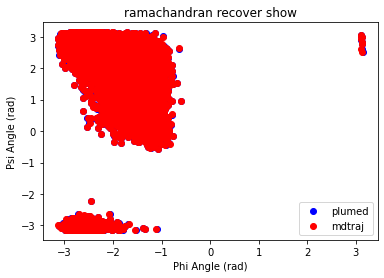

In [26]:
#load data
time, phi, psi = np.loadtxt('COLVAR', unpack=True)
traj = md.load_xtc('traj_comp.xtc', top='dialaA.pdb')

phi_angles = md.compute_phi(traj) 
psi_angles = md.compute_psi(traj)

plt.scatter(phi, psi, label = 'plumed',marker='o',c='b') #from plumed

plt.scatter(phi_angles[1], psi_angles[1], label = 'mdtraj',marker='o',c='r') #from mdtraj

plt.xlabel('Phi Angle (rad)')
plt.ylabel('Psi Angle (rad)')
plt.title('ramachandran recover show')
plt.legend()
plt.savefig('diala-master-A-ramachandran,step 100')

plt.show()

In [29]:
np.std(phi) 

0.5520570482078025

In [31]:
np.std(psi) 

1.0282962257257098

/share/apps/python/3.8.6/intel/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


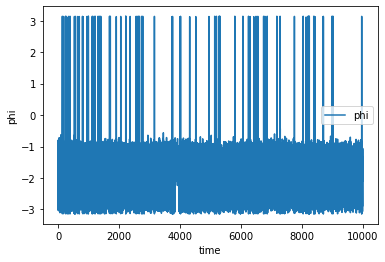

In [4]:
data.time,data.phi=data.time,data.phi
plt.plot(data.time,data.phi,label="phi")
# x-y axis labels
plt.xlabel("time")
plt.ylabel("phi")
plt.legend()

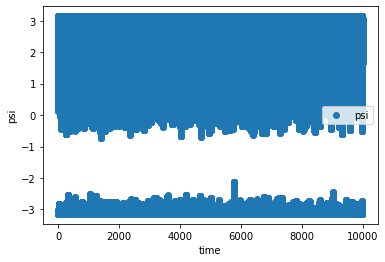

In [15]:
data.time,data.psi=data.time,data.psi
plt.scatter (data.time,data.psi, label="psi")
# x-y axis labels
plt.xlabel("time")

plt.ylabel("psi")
plt.legend()

In [16]:
traj = md.load_xtc('traj_comp.xtc', top='confout.gro')
a,phi = md.compute_phi(traj)
b,psi = md.compute_psi(traj)

In [18]:
print(psi)
print(len(psi))

[[2.877952 ]
 [2.4328592]
 [2.672416 ]
 ...
 [2.9279666]
 [2.4060454]
 [2.0807233]]
50001


In [ ]:
phi_standard=numpy.std(phi)

psi_standard=numpy.std(psi)

In [ ]:
fig = plt.figure(figsize=(12,4)) 
x_a = traj.time
y_a1 =phi1
y_a2 =data.phi
fig = plt.figure(num=3,figsize=(8,6),facecolor='w')
ax1 = fig.add_subplot(111)
ax1.plot(x_a, y_a1,'r',linewidth=3,linestyle='solid')
ax1.set_ylabel('phi1')
ax1.set_title("phi/psi VS time")
ax2 = ax1.twinx()  # this is the important function
ax2.scatter (x_a, y_a2, 'b',linewidth=3,linestyle='dashed')#supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
#ax2.set_xlim([0, np.e])
ax2.set_ylabel('psi')
ax1.set_xlabel('time')
plt.show()